# 1. Introduction Section: 
## Discussion of the business problem and the audience who would be interested in this project. 
## Description of the Problem and Background 
## Scenario: 
    
    I am currently a Business student from University of Alberta (UA) and desire to figure out any possible business plans for fresh graduated students. University of Alberta (UA) is such an international academic institute in Edmonton that attract a lot of students from more than 100 countries every year. While hard to find jobs and work in domestic companies has been the challenge for most international students. Thus, more and more fresh graduated students decide to start up their own business. The restaurant is such a kind of business that easy to start and develop.
    
    More and more people from other countries decide to live in Edmonton, which make the demographic composition becoming more and more comprehensive and diversified and bring more demands for different styles of food. However, the existing restaurants may not keep tracks on the changes on the demands. 
    
    My project will select the neighborhood around University of Alberta as the sample, aims to figure out where and what kinds of restaurants could be open to meet the needs for different food based on the changing trends of source of students. What is more, my project would also figure out whether existing some low-evaluated restaurants but good earning just because customers do not have other substitute restaurants.
    
## Business Problem: 
    To identify whether the existing restaurants could meet the demands for more and more kinds of food as the demographic composition in Edmonton has been more comprehensive and diversified.
    To figure whether existing some low-evaluated restaurants could be replaced.
	
## Interested Audience 
    The fresh international graduated students who would like to start up their first business.
    The new immigrates who would like to start up their first business in Canada.



# 2. Data Section: 
## Description of the data and its sources that will be used to solve the problem 
 
## The data will be used as follows:

    A table with the data about the borough, neighborhood and postal codes: This table would be scraped from Wikipedia and well organized in order to get the specific location data for Edmonton. In this project, I would use X-path package to scrape data.
    
    A table with the data about each borough’s coordinates data: This table would use the above table as the input to find out corresponding coordinates data. The table could provide the required information to map each region point. I would use geopy package to catch their coordinates data.
    
    A table with the data about the existing restaurant’s types, location, evaluation etc.: This table would contain the information existing restaurant’s types, location, evaluation to help me analyze the current situation and figure whether existing low-evaluated restaurants could be replaced by new ones. I would use Foursquare API to get the data.
    
    A table with the data about the source of students in University of Alberta: This table would help me contain the information about the changing trends of source of students in University of Alberta.
    
    I would use K-means to divide all the restaurants into different clusters and try to figure out the whether the existing types of restaurants could meet the needs for recent or even the future students. I would also try to use K-means to figure out what kinds of restaurants with low evaluation should be improved by the entering of new competitors.


# Part 1 Data Scraping!
   ## Scrape data by Xpath, then clean the unexpected elements

In [1]:
# !pip install lxml

In [2]:
#1.Scraping data from Wiki Pedia
    
#1.1 import required modules
import requests
from lxml import etree
import pandas as pd

#1.2 set url and headers
url = "https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_T"

headers = {
    "user-agent":"Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:90.0) Gecko/20100101 Firefox/90.0",
            }
    
#1.3 get html strings
response = requests.get(url,headers = headers)
content = response.content.decode("utf8")

#1.4 etree parse
html = etree.HTML(content)


In [3]:
#1.5 Xpath extract data
# /html/body/div[3]/div[3]/div[5]/div[1]/table[1]/tbody/tr[1]/td[3]/b
trs = html.xpath("///body/div[3]/div[3]/div[5]/div[1]/table[1]/tbody/tr")
#an empty list to input the dic-s
dic_list = []
for tr in trs:
    temp_dic = {}#temp dic for put values
    tds = tr.xpath("./td")
    for td in tds:
        Postalcode = td.xpath("./b/text()[1]")
        Borough = td.xpath("./span/a[1]/text()")
        Neighborhood = td.xpath("./span/a/text()")[1:] # because the first item is the borough name
        
        
        
        #to convert list elements of Neighborhood into str seperated by, 
        temp_str = ""
        if Neighborhood != []:
            counter = len(Neighborhood)
            for each in Neighborhood:
                counter -= 1
                temp_str = temp_str + each 
                if counter > 1:
                    temp_str = temp_str +  ", "
            Neighborhood = temp_str
         #to convert list elements of Neighborhood into str seperated by, 
        
        
        
        temp_dic = {
                "Postalcode":Postalcode,
                "Borough":Borough,
                "Neighborhood":Neighborhood, #since we may have one more items in the list 
                }
        dic_list.append(temp_dic)

dic_list

[{'Postalcode': ['T1A'], 'Borough': ['Medicine Hat'], 'Neighborhood': []},
 {'Postalcode': ['T2A'],
  'Borough': ['Calgary'],
  'Neighborhood': 'Penbrooke MeadowsMarlborough'},
 {'Postalcode': ['T3A'],
  'Borough': ['Calgary'],
  'Neighborhood': 'Dalhousie, Edgemont, HamptonsHidden Valley'},
 {'Postalcode': ['T4A'], 'Borough': ['Airdrie'], 'Neighborhood': []},
 {'Postalcode': ['T5A'],
  'Borough': ['Edmonton'],
  'Neighborhood': 'ClareviewLondonderry'},
 {'Postalcode': ['T6A'], 'Borough': ['Edmonton'], 'Neighborhood': 'Capilano'},
 {'Postalcode': ['T7A'], 'Borough': ['Drayton Valley'], 'Neighborhood': []},
 {'Postalcode': ['T8A'], 'Borough': ['Sherwood Park'], 'Neighborhood': []},
 {'Postalcode': ['T9A'], 'Borough': ['Wetaskiwin'], 'Neighborhood': []},
 {'Postalcode': ['T1B'], 'Borough': ['Medicine Hat'], 'Neighborhood': []},
 {'Postalcode': ['T2B'],
  'Borough': ['Calgary'],
  'Neighborhood': 'Forest Lawn, DoverErin Woods'},
 {'Postalcode': ['T3B'],
  'Borough': ['Calgary'],
  'Neighb

In [4]:
# creat a new Dataframe
columns= ['Postalcode','Borough','Neighborhood']
df_edm = pd.DataFrame(columns = columns,data = dic_list)
df_edm

,Postalcode,Borough,Neighborhood
0,[T1A],[Medicine Hat],[]
1,[T2A],[Calgary],Penbrooke MeadowsMarlborough
2,[T3A],[Calgary],"Dalhousie, Edgemont, HamptonsHidden Valley"
3,[T4A],[Airdrie],[]
4,[T5A],[Edmonton],ClareviewLondonderry
...,...,...,...
175,[T5Z],[Edmonton],Lake District
176,[T6Z],[],[]
177,[T7Z],[Stony Plain],[]
178,[T8Z],[],[]


In [5]:
#get the value from the [list]
df_edm["Postalcode"] = df_edm["Postalcode"].apply(lambda x:x[0]) 
#get the value from the [list] and make all the [] into ""
df_edm["Borough"] = df_edm["Borough"].apply(lambda x:x[0]if x != [] else "") 
#make all the [] into ""
df_edm["Neighborhood"] = df_edm["Neighborhood"].apply(lambda x:x if x != [] else "")


In [6]:
#clean all the empty string: ""
df_edm = df_edm[df_edm["Borough"]!= ""]
df_edm = df_edm[df_edm["Neighborhood"]!= ""]

In [7]:
df_edm = df_edm.reset_index(drop = True)
df_edm.shape

(72, 3)

In [8]:
df_edm

,Postalcode,Borough,Neighborhood
0,T2A,Calgary,Penbrooke MeadowsMarlborough
1,T3A,Calgary,"Dalhousie, Edgemont, HamptonsHidden Valley"
2,T5A,Edmonton,ClareviewLondonderry
3,T6A,Edmonton,Capilano
4,T2B,Calgary,"Forest Lawn, DoverErin Woods"
...,...,...,...
67,T5Y,Edmonton,Horse HillLake District
68,T6Y,Edmonton,Southeast Edmonton
69,T7Y,Spruce Grove,Parkland CountyCarvel
70,T2Z,Calgary,"Douglas Glen, McKenzie Lake, CopperfieldEast S..."


# Part 2 Making DataFrame Containing Coordinate Data
## install geocoder to quickly get the coordinate data

In [9]:
!pip install geocoder

In [10]:
import geocoder #free and faster API to get coordinates data

# define the function get_coords to get latt 
def get_coords(postal_code):

    coords = None

    while(coords == None):

        geocoder_1 = geocoder.arcgis('%s, Edmonton, Alberta'%format(postal_code))

        coords = geocoder_1.latlng

    return coords
#reference:https://www.coursera.org/learn/applied-data-science-capstone/discussions/all/threads/GUbn5pVFEemtYQ4WTQex_A

In [11]:
# get_coords("T3A")

In [12]:
#set the list for catch temp_dic 
coords_list = []
Postalcodes_list = df_edm["Postalcode"].tolist()
# print(Postalcodes_list)

for each in Postalcodes_list:
#     print(each)
    temp_dic = {}
    temp_coord = get_coords(each) 
    longitude = temp_coord[1]
    latitude = temp_coord[0]
    temp_dic = {
                "Postalcode":each,
                "latitude":latitude,
                "longitude":longitude,
                }
    coords_list.append(temp_dic)
#     break

df_edm_coords = pd.DataFrame(coords_list)
print("finished!!!!!!!!!")

finished!!!!!!!!!


In [13]:
df_edm_coords

,Postalcode,latitude,longitude
0,T2A,53.54624,-113.49037
1,T3A,53.54624,-113.49037
2,T5A,53.59443,-113.40844
3,T6A,53.55094,-113.43550
4,T2B,53.54624,-113.49037
...,...,...,...
67,T5Y,53.65196,-113.35747
68,T6Y,53.36686,-113.60763
69,T7Y,53.49069,-114.14729
70,T2Z,53.54624,-113.49037


In [14]:
df_merge = pd.merge(df_edm,df_edm_coords, on = "Postalcode")
df_merge
# df_merge.to_csv("week3_df_merge.csv")


,Postalcode,Borough,Neighborhood,latitude,longitude
0,T2A,Calgary,Penbrooke MeadowsMarlborough,53.54624,-113.49037
1,T3A,Calgary,"Dalhousie, Edgemont, HamptonsHidden Valley",53.54624,-113.49037
2,T5A,Edmonton,ClareviewLondonderry,53.59443,-113.40844
3,T6A,Edmonton,Capilano,53.55094,-113.43550
4,T2B,Calgary,"Forest Lawn, DoverErin Woods",53.54624,-113.49037
...,...,...,...,...,...
67,T5Y,Edmonton,Horse HillLake District,53.65196,-113.35747
68,T6Y,Edmonton,Southeast Edmonton,53.36686,-113.60763
69,T7Y,Spruce Grove,Parkland CountyCarvel,53.49069,-114.14729
70,T2Z,Calgary,"Douglas Glen, McKenzie Lake, CopperfieldEast S...",53.54624,-113.49037


In [15]:
# show the basic information of Toronto
print('The dataframe has {} boroughs and {} neighborhoods.'.format(
        len(df_merge['Borough'].unique()),
        df_merge.shape[0]
    )
)

The dataframe has 4 boroughs and 72 neighborhoods.


# Part3 Explore and Cluster the Neighborhoods 

In [16]:
#install required packages
!pip install geopy
!pip install folium==0.5.0

In [17]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

print('Libraries imported.')

Libraries imported.


In [18]:
#get the coordinates inf of Toronto
geocoder_Edm = geocoder.arcgis('Edmonton, Alberta')

coords_Edm = geocoder_Edm.latlng
coords_Edm

[53.54624000000007, -113.49036999999998]

## Create a map of Edmonton with neighborhoods superimposed on top.

In [19]:
# create map of Toronto using latitude and longitude values
map_Edm = folium.Map(location=[coords_Edm[0], coords_Edm[1]], zoom_start=10)

# add markers to map
for lat, lng, borough, neighborhood in zip(df_merge['latitude'], df_merge['longitude'], df_merge['Borough'], df_merge['Neighborhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False
                        ).add_to(map_Edm) 

map_Edm

 ## Next, we are going to start utilizing the Foursquare API to explore the neighborhoods and segment them.

## For this lab, I will focus on the Edmonton Borough

In [155]:
Edm_df = df_merge[df_merge['Borough'] == 'Edmonton'].reset_index(drop=True)
Edm_df.head()
len(Edm_df)

38

In [21]:
#Let's get the geographical coordinates of Downtown Toronto
address ='Edmonton'
geolocator = Nominatim(user_agent="To_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Downtown Toronto are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Downtown Toronto are 53.535411, -113.507996.


In [22]:
# create map of Manhattan using latitude and longitude values
map_Edm = folium.Map(location=[latitude, longitude], zoom_start=11)

# add markers to map
for lat, lng, label in zip(Edm_df['latitude'], Edm_df['longitude'], Edm_df['Neighborhood']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_Edm)  
    
map_Edm

## Next, we are going to start utilizing the Foursquare API to explore the neighborhoods and segment them.

In [23]:
#Define Foursquare Credentials and Version
CLIENT_ID = 'TMSOIBPYAEZH2I111PMRWAMLGYGBGGTW2V5PJRGKHXL14JEH' # your Foursquare ID
CLIENT_SECRET = '420MGMXY1GS0DXLCXKGGGA3OBFHMP1RJFH1BIXBYRC4YPKW2' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version
LIMIT = 100 # A default Foursquare API limit value

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: TMSOIBPYAEZH2I111PMRWAMLGYGBGGTW2V5PJRGKHXL14JEH
CLIENT_SECRET:420MGMXY1GS0DXLCXKGGGA3OBFHMP1RJFH1BIXBYRC4YPKW2


In [24]:
df_merge.loc[0, 'Neighborhood']

'Penbrooke MeadowsMarlborough'

In [25]:

neighborhood_latitude = df_merge.loc[0, 'latitude'] # neighborhood latitude value
neighborhood_longitude = df_merge.loc[0, 'longitude'] # neighborhood longitude value

neighborhood_name = df_merge.loc[0, 'Neighborhood'] # neighborhood name

print('Latitude and longitude values of {} are {}, {}.'.format(neighborhood_name, 
                                                               neighborhood_latitude, 
                                                               neighborhood_longitude))



Latitude and longitude values of Penbrooke MeadowsMarlborough are 53.54624000000007, -113.49036999999998.


## First, let's create the GET request URL. Name your URL url.

In [26]:


# type your answer here
LIMIT = 100 # limit of number of venues returned by Foursquare API
radius = 300 # define radius /m

url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    neighborhood_latitude, 
    neighborhood_longitude, 
    radius, 
    LIMIT)
url



'https://api.foursquare.com/v2/venues/explore?&client_id=TMSOIBPYAEZH2I111PMRWAMLGYGBGGTW2V5PJRGKHXL14JEH&client_secret=420MGMXY1GS0DXLCXKGGGA3OBFHMP1RJFH1BIXBYRC4YPKW2&v=20180605&ll=53.54624000000007,-113.49036999999998&radius=300&limit=100'

In [27]:
results = requests.get(url).json()
# results

## From the Foursquare lab in the previous module, we know that all the information is in the items key. Before we proceed, let's borrow the get_category_type function from the Foursquare lab.

In [28]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

# get the result for Foursquare API
venues = results['response']['groups'][0]['items']
    
nearby_venues = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns #read for loop first
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head()

<ipython-input-28-6b7e76ab8bb2>:16: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  nearby_venues = json_normalize(venues) # flatten JSON


,name,categories,lat,lng
0,Sir Winston Churchill Square,Plaza,53.543885,-113.490163
1,JOEY Bell Tower,New American Restaurant,53.544913,-113.493746
2,Art Gallery of Alberta,Art Gallery,53.544695,-113.489196
3,Royal Alberta Museum,Museum,53.546842,-113.490511
4,Rose and Crown,Pub,53.545639,-113.493329


In [29]:
print('{} venues were returned by Foursquare.'.format(nearby_venues.shape[0]))

16 venues were returned by Foursquare.


## Explore Neighborhoods in Edmonton


In [30]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

## Now write the code to run the above function on each neighborhood and create a new dataframe called downtown_venues.

In [31]:


# type your answer here
names = Edm_df['Neighborhood']
latitudes = Edm_df['latitude']
longitudes = Edm_df['longitude']

Edm_venues = getNearbyVenues(names, latitudes, longitudes, radius=500)



ClareviewLondonderry
Capilano
Beverly
Capilano, Southeast IndustrialBonnie Doon
Londonderry
Bonnie Doon
LondonderryCalder
Bonnie DoonUniversity
Queen Mary ParkBlatchford)
UniversityStrathcona Place
Downtown Fringe
SouthgateRiverbend
Downtown
KaskitayoAspen Gardens
DowntownDowntown Fringe
Mill Woods
Westmount, CalderMistatim
Mill Woods
Westmount, Groat EstateNorthwest Industrial
GlenoraDowntown Fringe
South Industrial
Jasper Place
Southeast IndustrialClover Bar
Jasper PlaceBuena Vista
Riverbend
Northwest IndustrialWinterburn
Clover Bar
West Jasper PlaceWest Edmonton Mall
The Meadows
Mistatim
The PalisadesCastle Downs
Beverly
Heritage Valley
Castle Downs
Ellerslie
Horse HillLake District
Southeast Edmonton
Lake District


In [32]:
print(Edm_venues.shape)
Edm_venues.head()

(324, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,ClareviewLondonderry,53.59443,-113.40844,Cora's,53.597832,-113.408026,Breakfast Spot
1,ClareviewLondonderry,53.59443,-113.40844,Earls Restaurant & Bar,53.594738,-113.414936,American Restaurant
2,ClareviewLondonderry,53.59443,-113.40844,TD Canada Trust,53.594129,-113.415594,Bank
3,ClareviewLondonderry,53.59443,-113.40844,Michaels,53.598221,-113.405771,Arts & Crafts Store
4,ClareviewLondonderry,53.59443,-113.40844,Red Robin Gourmet Burgers and Brews,53.597565,-113.412076,Burger Joint


In [33]:
#check for how many venues were returned for each neighborhoody 
Edm_venues.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Beverly,16,16,16,16,16,16
Bonnie Doon,16,16,16,16,16,16
Bonnie DoonUniversity,9,9,9,9,9,9
Capilano,5,5,5,5,5,5
"Capilano, Southeast IndustrialBonnie Doon",5,5,5,5,5,5
Castle Downs,1,1,1,1,1,1
ClareviewLondonderry,13,13,13,13,13,13
Clover Bar,1,1,1,1,1,1
Downtown,100,100,100,100,100,100


In [34]:
print('There are {} uniques categories.'.format(len(Edm_venues['Venue Category'].unique())))

There are 117 uniques categories.


## Analyze Each Neighborhood

In [35]:
# one hot encoding 
#The most popular encoding in this Venue
Edm_onehot = pd.get_dummies(Edm_venues[['Venue Category']], prefix="", prefix_sep="")
Edm_onehot.head()

,American Restaurant,Arts & Crafts Store,Asian Restaurant,Auto Workshop,BBQ Joint,Baby Store,Bakery,Bank,Bar,Bowling Alley,Brazilian Restaurant,Breakfast Spot,Brewery,Bubble Tea Shop,Burger Joint,Burrito Place,Bus Station,Business Service,Café,Caribbean Restaurant,Casino,Cheese Shop,Chinese Restaurant,Chocolate Shop,Clothing Store,Coffee Shop,College Gym,College Residence Hall,Community Center,Construction & Landscaping,Convenience Store,Cosmetics Shop,Creperie,Dance Studio,Department Store,Dessert Shop,Diner,Discount Store,Doner Restaurant,Eastern European Restaurant,Electronics Store,Factory,Farmers Market,Fast Food Restaurant,Food & Drink Shop,Food Truck,French Restaurant,Fried Chicken Joint,Furniture / Home Store,Gas Station,Gastropub,Gay Bar,Gift Shop,Grocery Store,Gym,Gym / Fitness Center,Hardware Store,Health & Beauty Service,Hockey Arena,Home Service,Hotel,Housing Development,Ice Cream Shop,Indian Restaurant,Irish Pub,Italian Restaurant,Japanese Restaurant,Korean Restaurant,Light Rail Station,Lingerie Store,Liquor Store,Lounge,Mediterranean Restaurant,Mexican Restaurant,Miscellaneous Shop,Movie Theater,Museum,Music Store,New American Restaurant,Nightclub,Noodle House,Office,Paper / Office Supplies Store,Park,Pet Store,Pharmacy,Pizza Place,Plaza,Pool Hall,Print Shop,Pub,Restaurant,Rock Club,Salad Place,Sandwich Place,Scenic Lookout,Shoe Store,Shop & Service,Shopping Mall,Smoke Shop,Smoothie Shop,Sporting Goods Shop,Stables,Steakhouse,Storage Facility,Supermarket,Sushi Restaurant,Tapas Restaurant,Thai Restaurant,Theater,Toy / Game Store,Turkish Restaurant,Video Game Store,Vietnamese Restaurant,Whisky Bar,Wine Shop,Yoga Studio
0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [36]:
# add neighborhood column back to dataframe
Edm_onehot['Neighborhood'] = Edm_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [Edm_onehot.columns[-1]] + list(Edm_onehot.columns[:-1])
Edm_onehot = Edm_onehot[fixed_columns]

Edm_onehot.head()

,Neighborhood,American Restaurant,Arts & Crafts Store,Asian Restaurant,Auto Workshop,BBQ Joint,Baby Store,Bakery,Bank,Bar,Bowling Alley,Brazilian Restaurant,Breakfast Spot,Brewery,Bubble Tea Shop,Burger Joint,Burrito Place,Bus Station,Business Service,Café,Caribbean Restaurant,Casino,Cheese Shop,Chinese Restaurant,Chocolate Shop,Clothing Store,Coffee Shop,College Gym,College Residence Hall,Community Center,Construction & Landscaping,Convenience Store,Cosmetics Shop,Creperie,Dance Studio,Department Store,Dessert Shop,Diner,Discount Store,Doner Restaurant,Eastern European Restaurant,Electronics Store,Factory,Farmers Market,Fast Food Restaurant,Food & Drink Shop,Food Truck,French Restaurant,Fried Chicken Joint,Furniture / Home Store,Gas Station,Gastropub,Gay Bar,Gift Shop,Grocery Store,Gym,Gym / Fitness Center,Hardware Store,Health & Beauty Service,Hockey Arena,Home Service,Hotel,Housing Development,Ice Cream Shop,Indian Restaurant,Irish Pub,Italian Restaurant,Japanese Restaurant,Korean Restaurant,Light Rail Station,Lingerie Store,Liquor Store,Lounge,Mediterranean Restaurant,Mexican Restaurant,Miscellaneous Shop,Movie Theater,Museum,Music Store,New American Restaurant,Nightclub,Noodle House,Office,Paper / Office Supplies Store,Park,Pet Store,Pharmacy,Pizza Place,Plaza,Pool Hall,Print Shop,Pub,Restaurant,Rock Club,Salad Place,Sandwich Place,Scenic Lookout,Shoe Store,Shop & Service,Shopping Mall,Smoke Shop,Smoothie Shop,Sporting Goods Shop,Stables,Steakhouse,Storage Facility,Supermarket,Sushi Restaurant,Tapas Restaurant,Thai Restaurant,Theater,Toy / Game Store,Turkish Restaurant,Video Game Store,Vietnamese Restaurant,Whisky Bar,Wine Shop,Yoga Studio
0,ClareviewLondonderry,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,ClareviewLondonderry,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,ClareviewLondonderry,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,ClareviewLondonderry,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,ClareviewLondonderry,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [37]:
Edm_grouped = Edm_onehot.groupby('Neighborhood').mean().reset_index() #requency of occurrence of each category
Edm_grouped.head()

,Neighborhood,American Restaurant,Arts & Crafts Store,Asian Restaurant,Auto Workshop,BBQ Joint,Baby Store,Bakery,Bank,Bar,Bowling Alley,Brazilian Restaurant,Breakfast Spot,Brewery,Bubble Tea Shop,Burger Joint,Burrito Place,Bus Station,Business Service,Café,Caribbean Restaurant,Casino,Cheese Shop,Chinese Restaurant,Chocolate Shop,Clothing Store,Coffee Shop,College Gym,College Residence Hall,Community Center,Construction & Landscaping,Convenience Store,Cosmetics Shop,Creperie,Dance Studio,Department Store,Dessert Shop,Diner,Discount Store,Doner Restaurant,Eastern European Restaurant,Electronics Store,Factory,Farmers Market,Fast Food Restaurant,Food & Drink Shop,Food Truck,French Restaurant,Fried Chicken Joint,Furniture / Home Store,Gas Station,Gastropub,Gay Bar,Gift Shop,Grocery Store,Gym,Gym / Fitness Center,Hardware Store,Health & Beauty Service,Hockey Arena,Home Service,Hotel,Housing Development,Ice Cream Shop,Indian Restaurant,Irish Pub,Italian Restaurant,Japanese Restaurant,Korean Restaurant,Light Rail Station,Lingerie Store,Liquor Store,Lounge,Mediterranean Restaurant,Mexican Restaurant,Miscellaneous Shop,Movie Theater,Museum,Music Store,New American Restaurant,Nightclub,Noodle House,Office,Paper / Office Supplies Store,Park,Pet Store,Pharmacy,Pizza Place,Plaza,Pool Hall,Print Shop,Pub,Restaurant,Rock Club,Salad Place,Sandwich Place,Scenic Lookout,Shoe Store,Shop & Service,Shopping Mall,Smoke Shop,Smoothie Shop,Sporting Goods Shop,Stables,Steakhouse,Storage Facility,Supermarket,Sushi Restaurant,Tapas Restaurant,Thai Restaurant,Theater,Toy / Game Store,Turkish Restaurant,Video Game Store,Vietnamese Restaurant,Whisky Bar,Wine Shop,Yoga Studio
0,Beverly,0.0,0.0,0.0,0.0,0.0,0.0,0.0625,0.0000,0.0,0.0000,0.0,0.0000,0.0,0.0,0.0625,0.0,0.0625,0.000000,0.0,0.0625,0.0,0.0,0.0,0.0,0.0,0.0625,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0,0.0,0.0,0.125000,0.0,0.0,0.0000,0.0,0.0,0.0000,0.0,0.0,0.0,0.0000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0625,0.0,0.000000,0.0625,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0625,0.0,0.0625,0.0625,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.125000,0.0,0.0,0.0,0.0,0.0625,0.0,0.000000,0.0,0.0,0.000000,0.0625,0.0,0.0,0.0,0.0000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
1,Bonnie Doon,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0625,0.0,0.0625,0.0,0.0625,0.0,0.0,0.0000,0.0,0.0000,0.000000,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0625,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0625,0.0,0.0,0.0,0.125000,0.0,0.0,0.0625,0.0,0.0,0.0625,0.0,0.0,0.0,0.0625,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0625,0.0000,0.0,0.000000,0.0000,0.0,0.125,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0,0.0625,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0000,0.0,0.000000,0.0,0.0,0.000000,0.0000,0.0,0.0,0.0,0.0625,0.0,0.0,0.0,0.062500,0.0,0.0,0.0
2,Bonnie DoonUniversity,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0000,0.0,0.0000,0.0,0.0000,0.0,0.0,0.0000,0.0,0.0000,0.111111,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0,0.0,0.0,0.222222,0.0,0.0,0.0000,0.0,0.0,0.0000,0.0,0.0,0.0,0.0000,0.0,0.0,0.111111,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0000,0.0,0.111111,0.0000,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0,0.0000,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.111111,0.0,0.0,0.0,0.0,0.0000,0.0,0.111111,0.0,0.0,0.111111,0.0000,0.0,0.0,0.0,0.0000,0.0,0.0,0.0,0.111111,0.0,0.0,0.0
3,Capilano,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0000,0.0,0.0000,0.0,0.0000,0.0,0.0,0.0000,0.0,0.0000,0.000000,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0000,0.0,0.0,0.0,0.2,0.0,0.0,0.0,0.2,0.0,0.0,0.0,0.0,0.0,0.0000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0000,0.0,0.0,0.0000,0.0,0.0,0.0,0.0000,0.0,0.2,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0000,0.0,0.000000,0.0000,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0,0.0000,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.4,0.0,0.0000,0.0,0.000000,0.0,0.0,0.000000,0.0000,0.0,0.0,0.0,0.0000,0.0,0.0,0

## Let's print each neighborhood along with the top 5 most common venues

In [38]:
num_top_venues = 5

for hood in Edm_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = Edm_grouped[Edm_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Beverly----
                  venue  freq
0        Sandwich Place  0.12
1  Fast Food Restaurant  0.12
2           Pizza Place  0.06
3            Smoke Shop  0.06
4           Bus Station  0.06


----Bonnie Doon----
                         venue  freq
0         Fast Food Restaurant  0.12
1                 Liquor Store  0.12
2                    Irish Pub  0.06
3                      Theater  0.06
4  Eastern European Restaurant  0.06


----Bonnie DoonUniversity----
                  venue  freq
0  Fast Food Restaurant  0.22
1   Sporting Goods Shop  0.11
2        Hardware Store  0.11
3      Storage Facility  0.11
4        Sandwich Place  0.11


----Capilano----
                        venue  freq
0              Shop & Service   0.4
1  Construction & Landscaping   0.2
2                Dance Studio   0.2
3        Gym / Fitness Center   0.2
4         American Restaurant   0.0


----Capilano, Southeast IndustrialBonnie Doon----
               venue  freq
0   Business Service   0.2
1  Indi

## Let's put that into a _pandas_ dataframe

In [39]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [40]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = Edm_grouped['Neighborhood']

for ind in np.arange(Edm_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(Edm_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Beverly,Sandwich Place,Fast Food Restaurant,Pizza Place,Smoke Shop,Bus Station,Burger Joint,Supermarket,Coffee Shop,Caribbean Restaurant,Light Rail Station
1,Bonnie Doon,Fast Food Restaurant,Liquor Store,Irish Pub,Theater,Eastern European Restaurant,Coffee Shop,French Restaurant,Gas Station,Grocery Store,Breakfast Spot
2,Bonnie DoonUniversity,Fast Food Restaurant,Sporting Goods Shop,Hardware Store,Storage Facility,Sandwich Place,Korean Restaurant,Vietnamese Restaurant,Business Service,Office,Noodle House
3,Capilano,Shop & Service,Construction & Landscaping,Dance Studio,Gym / Fitness Center,American Restaurant,Movie Theater,Pharmacy,Pet Store,Park,Paper / Office Supplies Store
4,"Capilano, Southeast IndustrialBonnie Doon",Business Service,Indian Restaurant,Restaurant,Electronics Store,Breakfast Spot,American Restaurant,Pharmacy,Pet Store,Park,Paper / Office Supplies Store


## Cluster Neighborhoods


array([0, 0, 0, 0, 0, 3, 0, 5, 0, 0])

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


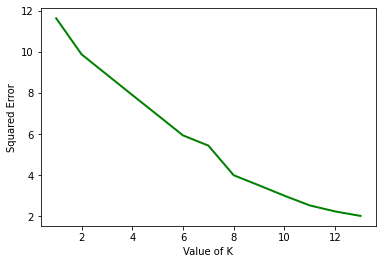

In [84]:
import matplotlib.pyplot as plt
# Elbow-point method

SquaredError=[]

ks = 15
Edm_grouped_clustering = Edm_grouped.drop('Neighborhood', 1)
for i in range (1,ks-1):
    kmeans = KMeans(n_clusters=i, random_state=0).fit(Edm_grouped_clustering)
    SquaredError.append(kmeans.inertia_)
   
    
plt.plot(range(1,ks-1),SquaredError,color='g',linewidth='2')
plt.xlabel("Value of K")
plt.ylabel("Squared Error")
plt.show()



In [85]:
#As the graph show above, 7 is the best K

#Run k-means to cluster the neighborhood into 5 clusters.

# set number of clusters
kclusters = 7

Edm_grouped_clustering = Edm_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(Edm_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10]

array([2, 2, 2, 2, 2, 2, 2, 1, 2, 2])

In [86]:
#restart it for test
neighborhoods_venues_sorted = neighborhoods_venues_sorted.drop(columns=['Cluster Labels'])

In [87]:
# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

Edm_merged = Edm_df

# merge manhattan_grouped with manhattan_data to add latitude/longitude for each neighborhood
Edm_merged = Edm_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

Edm_merged.head() # check the last columns!
# del neighborhoods_venues_sorted["Cluster Labels"]
# neighborhoods_venues_sorted
Edm_merged.dropna(inplace=True)

In [44]:
# Edm_merged['Cluster Labels']=Edm_merged['Cluster Labels'].astype('int64')

In [101]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
#classify the data based on 'Cluster Labels'
for lat, lon, poi, cluster in zip(Edm_merged['latitude'], Edm_merged['longitude'], Edm_merged['Neighborhood'], Edm_merged['Cluster Labels']):
    #plot different venue in different color based on different Cluster Labels
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[int(cluster)-1],
        fill=True,
        fill_color=rainbow[int(cluster)-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

In [107]:
# The far living area for red
# Edm_merged.loc[Edm_merged['Cluster Labels'] == 0]



In [156]:
# The far industrial area for purple
Edm_merged.loc[Edm_merged['Cluster Labels'] == 1]



,Postalcode,Borough,Neighborhood,latitude,longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
16,T5L,Edmonton,"Westmount, CalderMistatim",53.585900,-113.554240,1.0,Fast Food Restaurant,American Restaurant,Miscellaneous Shop,Pharmacy,Pet Store,Park,Paper / Office Supplies Store,Office,Noodle House,Nightclub
26,T6S,Edmonton,Clover Bar,53.598235,-113.334579,1.0,Fast Food Restaurant,American Restaurant,Miscellaneous Shop,Pharmacy,Pet Store,Park,Paper / Office Supplies Store,Office,Noodle House,Nightclub


In [162]:
#The core living area for blue
#near the restaurant
len(Edm_merged.loc[Edm_merged['Cluster Labels'] == 2])



25

In [105]:
# Edm_merged.loc[Edm_merged['Cluster Labels'] == 3]
# Edm_merged.loc[Edm_merged['Cluster Labels'] == 4]
# Edm_merged.loc[Edm_merged['Cluster Labels'] == 5]
# Edm_merged.loc[Edm_merged['Cluster Labels'] == 6]


In [152]:
#select two area:
#Downtown Fringe
#UniversityStrathcona Place
df_downtown = pd.read_csv("downtown.csv",header=None)
df_university = pd.read_csv("university.csv",header=None)
df_downtown.columns = ["price"]
df_university.columns = ["price"]

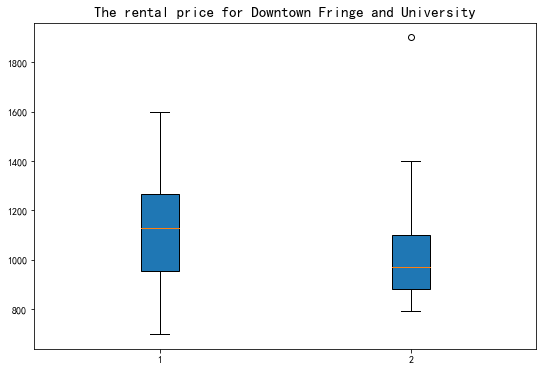

In [158]:
fig,ax=plt.subplots(figsize=(9,6))

dic_data = {"downtown":df_downtown["price"],
            
            "university":df_university["price"],
            }
val1,val2 = dic_data["downtown"],dic_data["university"]

ax.boxplot([val1,val2],patch_artist=True)
ax.set_title("The rental price for Downtown Fringe and University",fontsize=15) 
plt.show()

In [160]:
df_downtown.mean()

price    1115.975
dtype: float64

In [161]:
df_university.mean()

price    1039.590909
dtype: float64